In [1]:
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.interpolate as inter
import numpy as np

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


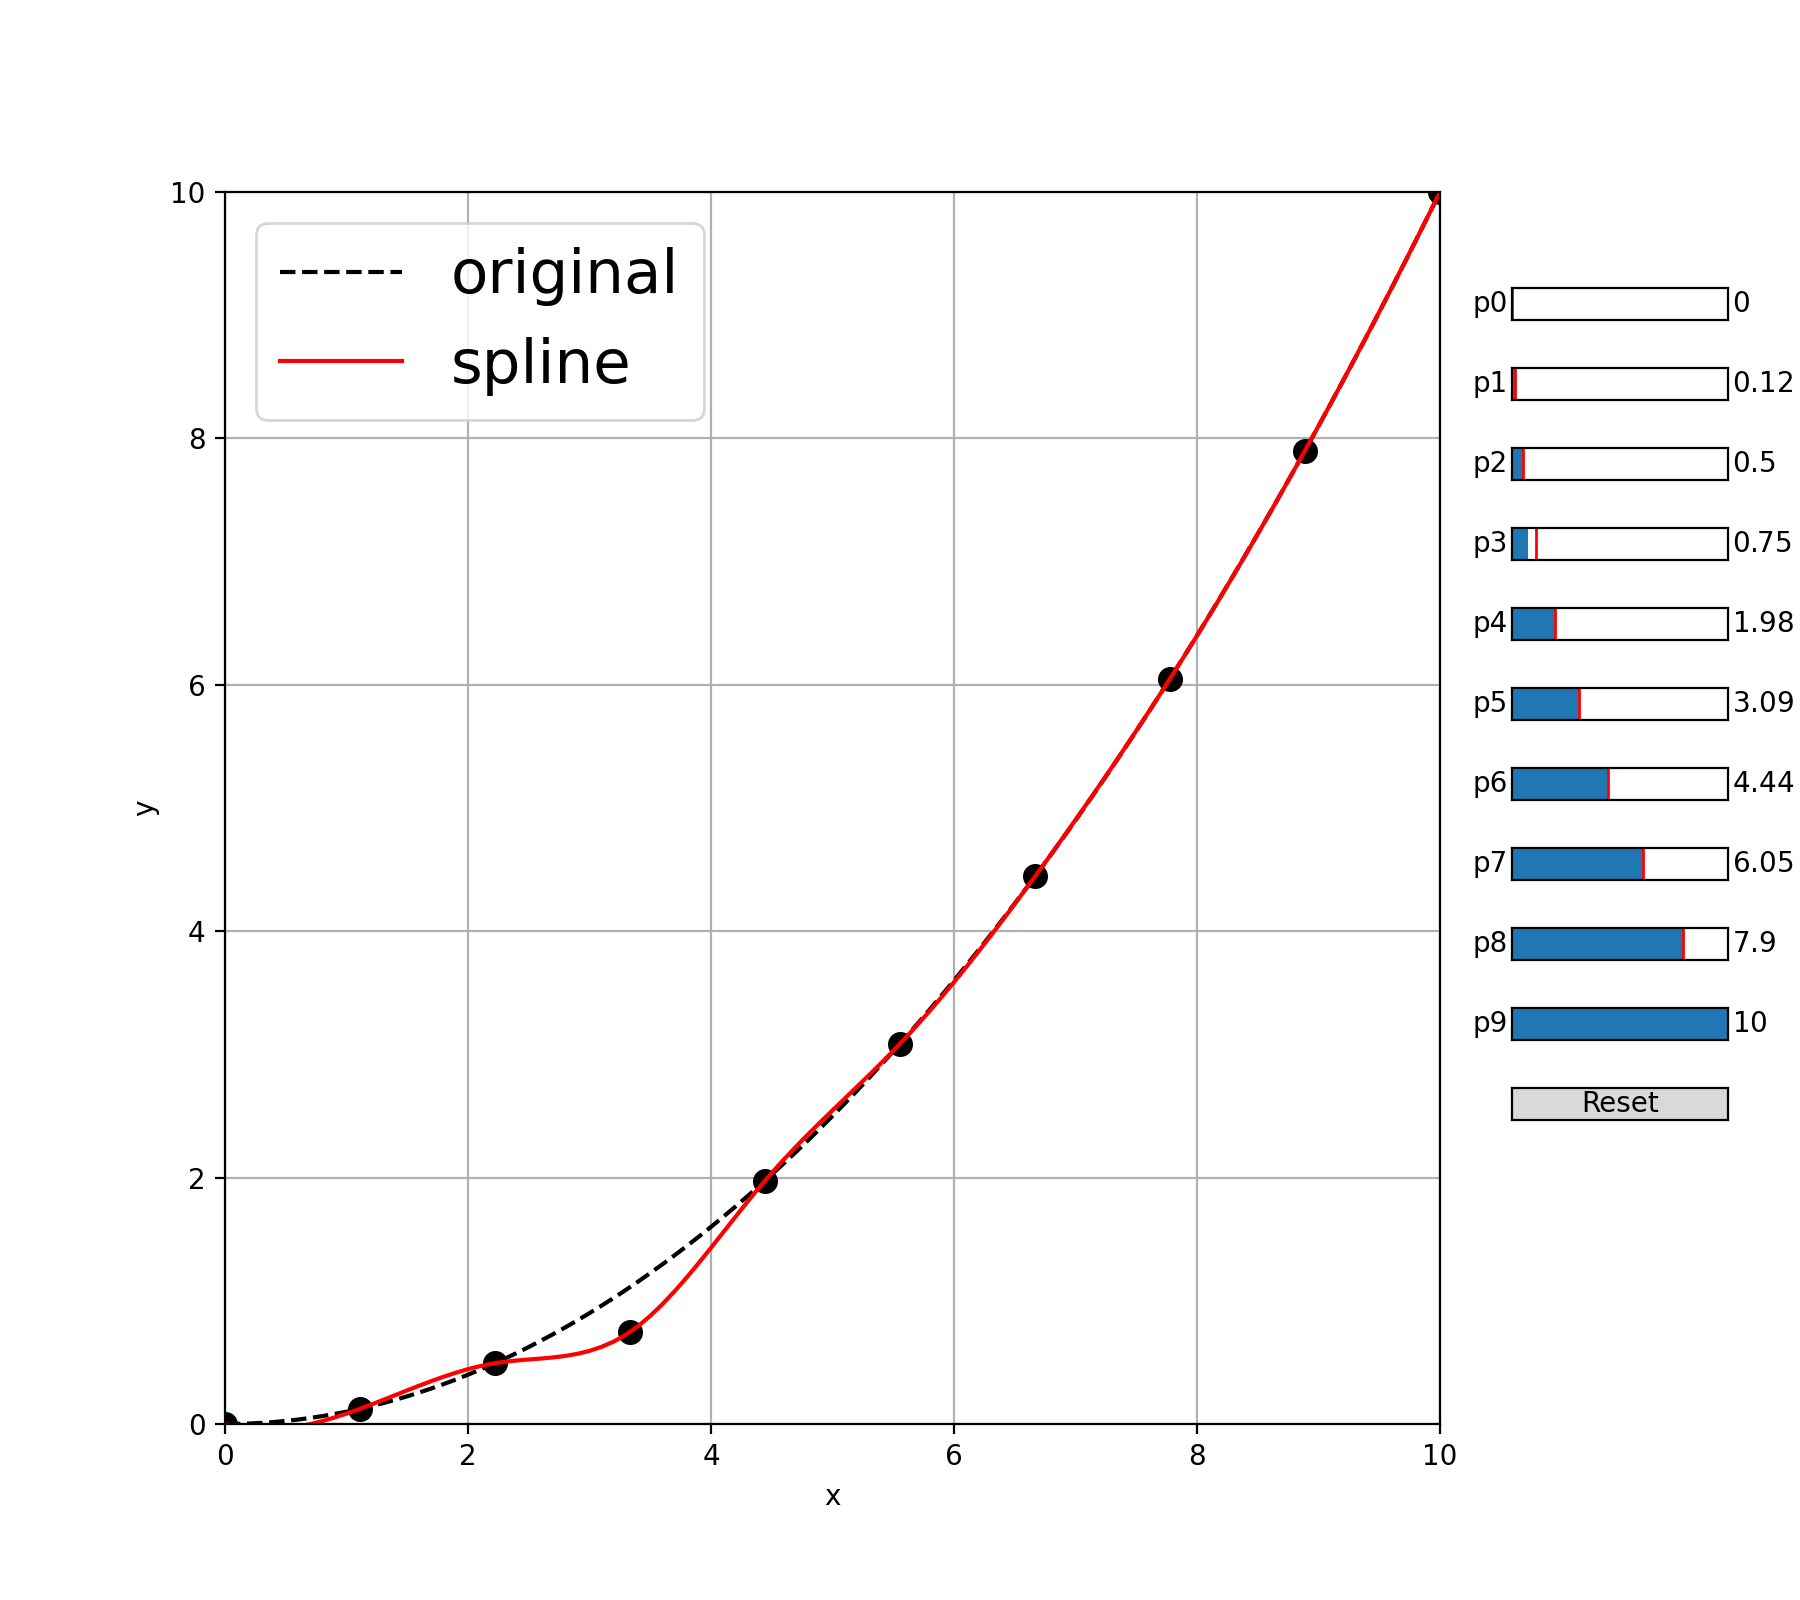

In [3]:
func = lambda x: 0.1*x**2

#get a list of points to fit a spline to as well
N = 10
xmin = 0 
xmax = 10 
x = np.linspace(xmin,xmax,N)

#spline fit
yvals = func(x)
spline = inter.InterpolatedUnivariateSpline (x, yvals)

#figure.subplot.right
mpl.rcParams['figure.subplot.right'] = 0.8

#set up a plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


pind = None #active point
epsilon = 5 #max pixel distance

def update(val):
    global yvals
    global spline
    # update curve
    for i in np.arange(N):
      yvals[i] = sliders[i].val 
    l.set_ydata(yvals)
    spline = inter.InterpolatedUnivariateSpline (x, yvals)
    m.set_ydata(spline(X))
    # redraw canvas while idle
    fig.canvas.draw_idle()

def reset(event):
    global yvals
    global spline
    #reset the values
    yvals = func(x)
    for i in np.arange(N):
      sliders[i].reset()
    spline = inter.InterpolatedUnivariateSpline (x, yvals)
    l.set_ydata(yvals)
    m.set_ydata(spline(X))
    # redraw canvas while idle
    fig.canvas.draw_idle()

def button_press_callback(event):
    'whenever a mouse button is pressed'
    global pind
    if event.inaxes is None:
        return
    if event.button != 1:
        return
    #print(pind)
    pind = get_ind_under_point(event)    

def button_release_callback(event):
    'whenever a mouse button is released'
    global pind
    if event.button != 1:
        return
    pind = None

def get_ind_under_point(event):
    'get the index of the vertex under point if within epsilon tolerance'

    # display coords
    #print('display x is: {0}; display y is: {1}'.format(event.x,event.y))
    t = ax1.transData.inverted()
    tinv = ax1.transData 
    xy = t.transform([event.x,event.y])
    #print('data x is: {0}; data y is: {1}'.format(xy[0],xy[1]))
    xr = np.reshape(x,(np.shape(x)[0],1))
    yr = np.reshape(yvals,(np.shape(yvals)[0],1))
    xy_vals = np.append(xr,yr,1)
    xyt = tinv.transform(xy_vals)
    xt, yt = xyt[:, 0], xyt[:, 1]
    d = np.hypot(xt - event.x, yt - event.y)
    indseq, = np.nonzero(d == d.min())
    ind = indseq[0]

    #print(d[ind])
    if d[ind] >= epsilon:
        ind = None

    #print(ind)
    return ind

def motion_notify_callback(event):
    'on mouse movement'
    global yvals
    if pind is None:
        return
    if event.inaxes is None:
        return
    if event.button != 1:
        return

    #update yvals
    #print('motion x: {0}; y: {1}'.format(event.xdata,event.ydata))
    yvals[pind] = event.ydata 

    # update curve via sliders and draw
    sliders[pind].set_val(yvals[pind])
    fig.canvas.draw_idle()

X = np.arange(0,xmax+1,0.1)
ax1.plot (X, func(X), 'k--', label='original')
l, = ax1.plot (x,yvals,color='k',linestyle='none',marker='o',markersize=8)
m, = ax1.plot (X, spline(X), 'r-', label='spline')



ax1.set_yscale('linear')
ax1.set_xlim(0, xmax)
ax1.set_ylim(0,xmax)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=2,prop={'size':22})

sliders = []

for i in np.arange(N):

    axamp = plt.axes([0.84, 0.8-(i*0.05), 0.12, 0.02])
    # Slider
    s = Slider(axamp, 'p{0}'.format(i), 0, 10, valinit=yvals[i])
    sliders.append(s)


for i in np.arange(N):
    #samp.on_changed(update_slider)
    sliders[i].on_changed(update)

axres = plt.axes([0.84, 0.8-((N)*0.05), 0.12, 0.02])
bres = Button(axres, 'Reset')
bres.on_clicked(reset)

fig.canvas.mpl_connect('button_press_event', button_press_callback)
fig.canvas.mpl_connect('button_release_event', button_release_callback)
fig.canvas.mpl_connect('motion_notify_event', motion_notify_callback)

plt.show()